<a href="https://colab.research.google.com/github/itsmenisha/Codesoft/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Importing Libraries and Loading Data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter
# Load the datasets
train_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')


2.Exploring the Data

In [ ]:
# Display basic information about the datasets
print("Train Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())

# Display the first few rows of the train dataset
print("\nTrain Data Sample:")
print(train_data.head())

# Check for missing values in both datasets
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177626 entries, 0 to 177625
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             177626 non-null  int64  
 1   trans_date_trans_time  177626 non-null  object 
 2   cc_num                 177626 non-null  int64  
 3   merchant               177626 non-null  object 
 4   category               177625 non-null  object 
 5   amt                    177625 non-null  float64
 6   first                  177625 non-null  object 
 7   last                   177625 non-null  object 
 8   gender                 177625 non-null  object 
 9   street                 177625 non-null  object 
 10  city                   177625 non-null  object 
 11  state                  177625 non-null  object 
 12  zip                    177625 non-null  float64
 13  lat                    177625 non-null  float64
 14  long               

3.Data Preprocessing

In [ ]:
# Removing rows with missing values
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

4.Visualizing Data

1.  Visualize the distribution of the target variable (fraudulent or not)

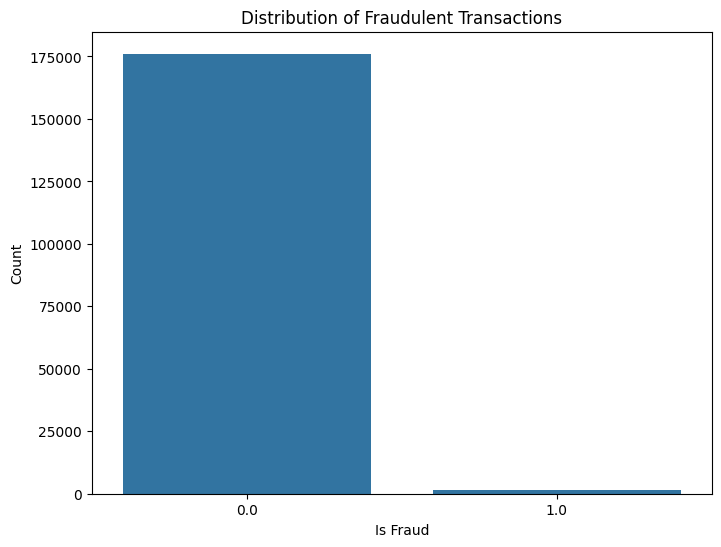

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

2.  Explore the distribution of transaction amounts by fraud status

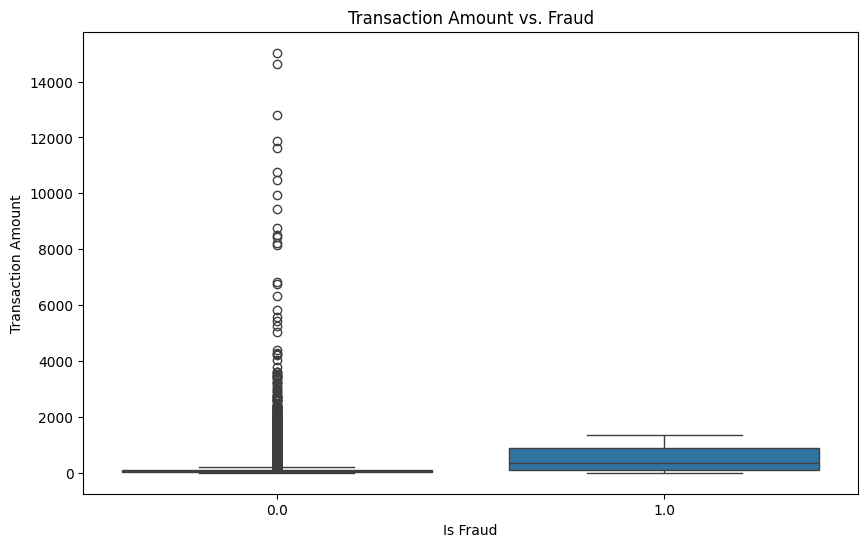

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=train_data)
plt.title('Transaction Amount vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

3. Data imbalance check

In [ ]:
fig = px.pie(values=train_data['is_fraud'].value_counts(), names=["Genuine","Fraud"] , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

<ipython-input-14-934c6b9f953d>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




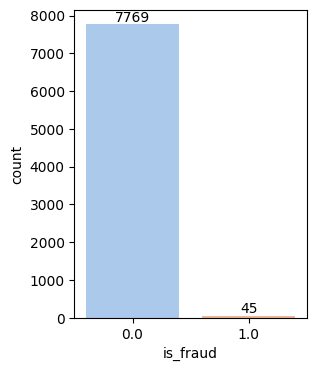

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='is_fraud',data=train_data,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
print('Genuine:', round(train_data['is_fraud'].value_counts()[0]/len(train_data) * 100,2), '% of the dataset')
print('Frauds:', round(train_data['is_fraud'].value_counts()[1]/len(train_data) * 100,2), '% of the dataset')

Genuine: 99.42 % of the dataset
Frauds: 0.58 % of the dataset


4.Data cleaning

In [ ]:
train_data.info(),test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7814 entries, 0 to 7813
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   7814 non-null   int64         
 1   trans_date_trans_time        7814 non-null   datetime64[ns]
 2   cc_num                       7814 non-null   int64         
 3   merchant                     7814 non-null   object        
 4   category                     7814 non-null   object        
 5   amt                          7814 non-null   float64       
 6   first                        7814 non-null   object        
 7   last                         7814 non-null   object        
 8   gender                       7814 non-null   object        
 9   street                       7814 non-null   object        
 10  city                         7814 non-null   object        
 11  state                        7814 non-null   obj

(None, None)

5.Drop Columns

In [ ]:
drop_columns = ['Unnamed: 0','cc_num','merchant','trans_num','unix_time','first','last','street','zip']
train_data.drop(columns=drop_columns,inplace=True)
test_data.drop(columns=drop_columns,inplace=True)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(7814, 18)
(7797, 14)


6.Handle Date time

In [ ]:
train_data['trans_date_trans_time']=pd.to_datetime(train_data['trans_date_trans_time'])
train_data['trans_date']=train_data['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train_data['trans_date']=pd.to_datetime(train_data['trans_date'])
train_data['dob']=pd.to_datetime(train_data['dob'])

test_data['trans_date_trans_time']=pd.to_datetime(test_data['trans_date_trans_time'])
test_data['trans_date']=test_data['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test_data['trans_date']=pd.to_datetime(test_data['trans_date'])
test_data['dob']=pd.to_datetime(test_data['dob'])

Data Preprocessing

1.   Feature Engineering

In [ ]:
# Calculate Age in Years
train_data["age"] = (train_data["trans_date"] - train_data["dob"]).dt.days / 365.25
test_data["age"] = (test_data["trans_date"] - test_data["dob"]).dt.days / 365.25

# Get Transaction Month & Year
train_data['trans_month'] = pd.DatetimeIndex(train_data['trans_date']).month
train_data['trans_year'] = pd.DatetimeIndex(train_data['trans_date']).year
test_data['trans_month'] = pd.DatetimeIndex(test_data['trans_date']).month
test_data['trans_year'] = pd.DatetimeIndex(test_data['trans_date']).year

# Calculate distance between merchant and home location
train_data['latitudinal_distance'] = abs(round(train_data['merch_lat'] - train_data['lat'], 3))
train_data['longitudinal_distance'] = abs(round(train_data['merch_long'] - train_data['long'], 3))

test_data['latitudinal_distance'] = abs(round(test_data['merch_lat'] - test_data['lat'], 3))
test_data['longitudinal_distance'] = abs(round(test_data['merch_long'] - test_data['long'], 3))

# Drop Columns that are not relevant to predict fraud transaction
drop_columns = ['trans_date_trans_time', 'city', 'lat', 'long', 'job', 'dob', 'merch_lat', 'merch_long', 'trans_date', 'state']
train_data.drop(columns=drop_columns, inplace=True)
test_data.drop(columns=drop_columns, inplace=True)

# Convert categorical column gender into numerical
train_data.gender = train_data.gender.apply(lambda x: 1 if x == "M" else 0)
test_data.gender = test_data.gender.apply(lambda x: 1 if x == "M" else 0)

# One Hot Encoding of Category column
train_data = pd.get_dummies(train_data, columns=['category'], prefix='category')
test_data = pd.get_dummies(test_data, columns=['category'], prefix='category')

# Ensure test_data has the same columns as train_data, filling missing columns with 0
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)


In [ ]:
train_data.head()

,amt,gender,city_pop,is_fraud,trans_hour,trans_day,time_since_last_transaction,age,trans_month,trans_year,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495.0,0.0,0,1,NaN,30.814511,1,2019,...,False,False,False,False,True,False,False,False,False,False
1,107.23,0,149.0,0.0,0,1,NaN,40.531143,1,2019,...,True,False,False,False,False,False,False,False,False,False
2,220.11,1,4154.0,0.0,0,1,NaN,56.950034,1,2019,...,False,False,False,False,False,False,False,False,False,False
3,45.00,1,1939.0,0.0,0,1,NaN,51.969884,1,2019,...,False,False,False,False,False,False,False,False,False,False
4,41.96,1,99.0,0.0,0,1,NaN,32.763860,1,2019,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
test_data.head()

,amt,gender,city_pop,is_fraud,trans_hour,trans_day,time_since_last_transaction,age,trans_month,trans_year,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0.0,0,0,0,52.257358,6,2020,...,False,False,False,False,False,False,True,False,False,False
1,29.84,0,302,0.0,0,0,0,30.425736,6,2020,...,False,False,False,False,False,False,True,False,False,False
2,41.28,0,34496,0.0,0,0,0,49.667351,6,2020,...,False,True,False,False,False,False,False,False,False,False
3,60.05,1,54767,0.0,0,0,0,32.908966,6,2020,...,False,False,False,False,False,True,False,False,False,False
4,3.19,1,1126,0.0,0,0,0,64.960986,6,2020,...,False,False,False,False,False,False,False,False,False,True


2. Split Train and Test Data

In [ ]:
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']
X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

3. Handle Data Imbalance


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Initialize the SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the imputed training data
X_train, y_train= smote.fit_resample(X_train_imputed, y_train)

4. Standardize data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 1: Fit the StandardScaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Step 2: Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Model Building


1. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize and fit the Decision Tree classifier on the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7775
         1.0       0.00      0.00      0.00        22

    accuracy                           1.00      7797
   macro avg       0.50      0.50      0.50      7797
weighted avg       0.99      1.00      1.00      7797

